Extracting Dataset using Kaggle API

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from zipfile import ZipFile

In [4]:
dataset='/content/drive/MyDrive/Deep Learning/dog-cat-full-dataset-master.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
import os

In [6]:


path,dirs,files=next(os.walk('/content/dog-cat-full-dataset-master/data/train/cats'))
file_count=len(files)
print('No of Cat',file_count)


path,dirs,files=next(os.walk('/content/dog-cat-full-dataset-master/data/train/dogs'))
file_count=len(files)
print('No of Dog',file_count)

No of Cat 10000
No of Dog 9989


In [7]:
import numpy as np
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

Printing the name of images

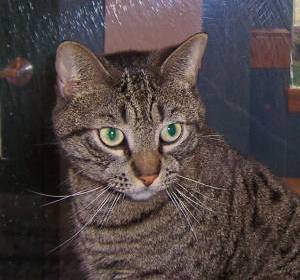

In [8]:
img=cv2.imread('/content/dog-cat-full-dataset-master/data/train/cats/cat.1.jpg')
cv2_imshow(img)

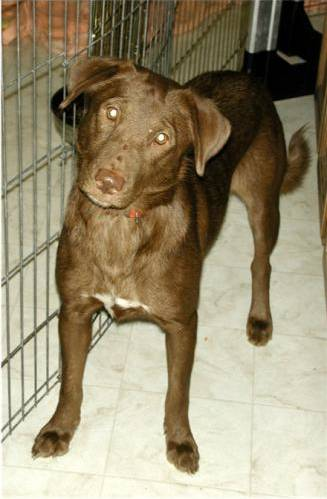

In [9]:
img=cv2.imread('/content/dog-cat-full-dataset-master/data/train/dogs/dog.1.jpg')
cv2_imshow(img)

Importing the Dependencies

Resizing all the images

In [13]:
#creating a directory for resized images
os.mkdir('/content/image resized1')

In [14]:
orginal_folder1 = '/content/dog-cat-full-dataset-master/data/train/cats'
resized_folder = '/content/image resized1/'

for i in range(500):
  filename=os.listdir(orginal_folder1)[i]

  img_path=orginal_folder1+'/'+filename

  if img_path.lower().endswith(('.png', '.jpg', '.jpeg')):
    img=Image.open(img_path)
    img=img.resize((224,224))
    img=img.convert('RGB')

    newImgPath=resized_folder+filename
    img.save(newImgPath)
  else:
    print(f"Skipping file: {img_path} - Not a supported image format")

In [15]:
orginal_folder1 = '/content/dog-cat-full-dataset-master/data/train/dogs'
resized_folder = '/content/image resized1/'

for i in range(500):
  filename=os.listdir(orginal_folder1)[i]

  img_path=orginal_folder1+'/'+filename

  if img_path.lower().endswith(('.png', '.jpg', '.jpeg')):
    img=Image.open(img_path)
    img=img.resize((224,224))
    img=img.convert('RGB')

    newImgPath=resized_folder+filename
    img.save(newImgPath)
  else:
    print(f"Skipping file: {img_path} - Not a supported image format")


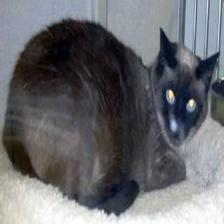

In [17]:
# display resized dog image
img=cv2.imread('/content/image resized1/cat.10005.jpg')
cv2_imshow(img)

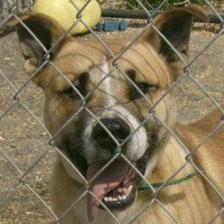

In [19]:
img=cv2.imread('/content/image resized1/dog.2087.jpg')
cv2_imshow(img)

**Creating labels for resized images of dogs and cats**

Cat --> 0

Dog --> 1

In [20]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/image resized1/')


labels = []

for i in range(1000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [21]:
print(filenames[0:5])
print(len(filenames))

['dog.5981.jpg', 'cat.11788.jpg', 'cat.6165.jpg', 'cat.5470.jpg', 'cat.8328.jpg']
1000


In [22]:
print(labels[0:5])
print(len(labels))

[1, 0, 0, 0, 0]
1000


In [23]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[500 500]


Converting all the resized images to numpy arrays

In [24]:
import cv2
import glob

In [25]:
image_directory = '/content/image resized1/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(dog_cat_images)

In [ ]:
type(dog_cat_images)

In [ ]:
print(dog_cat_images.shape)

In [26]:
X = dog_cat_images
Y = np.asarray(labels)

**Train Test Split**

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2,stratify=Y)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(1000, 224, 224, 3) (800, 224, 224, 3) (200, 224, 224, 3)


3200 --> training images

800 --> test images

In [30]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
print(X_train_scaled)

**Building the Neural Network**

In [31]:
import tensorflow as tf
import tensorflow_hub as hub

In [32]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [33]:
from tensorflow import keras
from tensorflow.keras import layers

# Define the input layer
input_layer = keras.Input(shape=(224, 224, 3))

# Load the pretrained MobileNet model without the top layer
pretrained_model = keras.applications.MobileNet(
    weights="imagenet",
    include_top=False,
    input_tensor=input_layer
)

# Add custom layers after the pretrained model
x = layers.GlobalAveragePooling2D()(pretrained_model.output)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(1, activation="sigmoid")(x)

# Define the new model
model = keras.Model(inputs=input_layer, outputs=x)

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Print model summary
model.summary()

<ipython-input-33-3293484f6a16>:8: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  pretrained_model = keras.applications.MobileNet(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,360,193 (12.82 MB)

 Trainable params: 3,338,305 (12.73 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [34]:
model.fit(X_train_scaled, Y_train, epochs=2)

Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 227s 8s/step - accuracy: 0.8521 - loss: 0.2886
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 253s 8s/step - accuracy: 0.9654 - loss: 0.1085
Epoch 3/5


KeyboardInterrupt: 

In [35]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.9014 - loss: 0.7472
Test Loss = 0.725829541683197
Test Accuracy = 0.9049999713897705


**Predictive System**

Path of the image to be predicted: /content/dog-cat-full-dataset-master/data/test/cats/cat.0.jpg


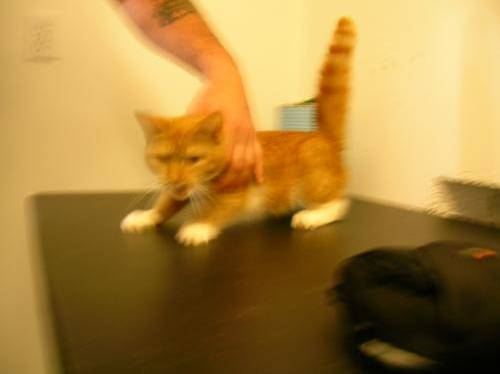

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 864ms/step
[[6.557308e-09]]
0
The image represents a Cat


In [36]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label > 0.5:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/dog-cat-full-dataset-master/data/train/dogs/dog.10060.jpg


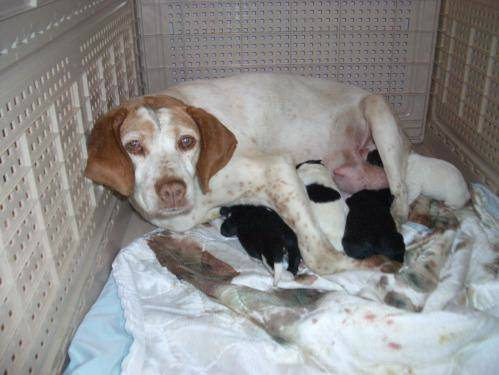

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
[[0.99999976]]
0
The image represents a Dog


In [42]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label > 0.5:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')